# Pymaceuticals Inc.
---

### Analysis

- The relationship between average tumor size and weight has strong, positive correlation, with a correlation coefficient of approximately 0.842. A fairly succinct relationship between the two variables.
- The presence of only one outlier across all four data sets of interest suggests strong, consistent methods of data gathering, treatment, measuring, and extraction. Further study on the singular outlier could provide further insights as to why it may be a skewed case (if at all)
- Propriva having the least number of timepoints of mice being measured overall could dictate either a) less mice available for testing of the specific treatment, or b) lower life expectancy for mice tested with this drug. Probably best not to use Propriva in treatment of tumors in mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
mouse_df = mouse_df.sort_values("Timepoint")
# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [2]:
# Checking the number of mice. (249)
len(mouse_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = mouse_df[mouse_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
dup_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [6]:
# Checking the number of mice in the clean DataFrame. (248)
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen = clean_df.groupby("Drug Regimen")
regimen = clean_df.groupby("Drug Regimen")
tumor_vol = regimen["Tumor Volume (mm3)"]

mean_tv = tumor_vol.mean()
median_tv = tumor_vol.median()
var_tv = tumor_vol.var()
std_tv = tumor_vol.std()
ste_tv = tumor_vol.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tv,"Median Tumor Volume":median_tv,"Tumor Volume Variance":var_tv,
                         "Tumor Volume Std. Dev.":std_tv,"Tumor Volume Std. Err.":ste_tv})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df["Tumor Volume (mm3)"].agg([np.sum,"mean",np.median,"median",st.variation,"var",st.tstd,"std",st.sem,"sem"])

IndexError: tuple index out of range

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

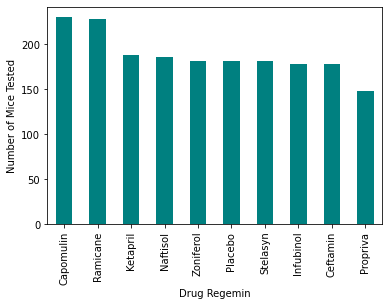

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandasplot = clean_df["Drug Regimen"].value_counts().plot(kind="bar",figsize=(6,4),color="teal")
pandasplot.set_xlabel("Drug Regemin")
pandasplot.set_ylabel("Number of Mice Tested")

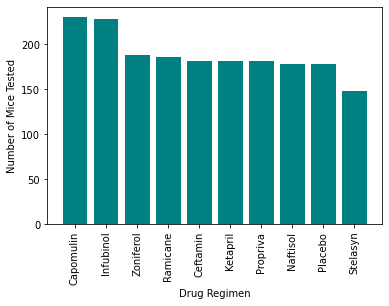

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, color='teal')
x_ticks = clean_df["Drug Regimen"].unique()
plt.xlabel("Drug Regimen")
plt.xticks(x_ticks,rotation = 'vertical')
plt.ylabel("Number of Mice Tested")
plt.show()

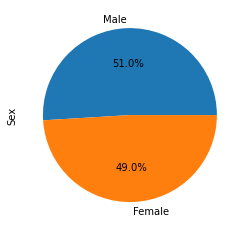

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot.pie(autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x2adb27db508>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

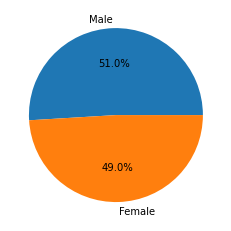

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = clean_df["Sex"].value_counts()
sex_sorted = clean_df["Sex"].sort_values(ascending=False)
labels=sex_sorted.unique()
plt.pie(x_axis,autopct='%1.1f%%',labels=labels)

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
id_time = clean_df.groupby("Mouse ID")
max_time = id_time["Timepoint"].max()
max_time.name = "Last Timepoint"
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = clean_df
merge_df = pd.merge(clean_df,max_time,on="Mouse ID",how="outer")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,n304,40,59.830507,4,Naftisol,Male,9,26,45
1876,n304,45,63.586395,4,Naftisol,Male,9,26,45
1877,l264,0,45.000000,0,Ketapril,Female,15,30,10
1878,l264,5,46.668766,0,Ketapril,Female,15,30,10


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#tvd = 'tumor vol data', regimens = Drug Regimens
tvd = [[],
       [],
       [],
       []]

row_df = merge_df.loc[merge_df["Timepoint"]==merge_df["Last Timepoint"]]
for i in range(len(row_df)):
    if row_df["Drug Regimen"].iloc[i] in treatments:
        for j in range(4):
            if row_df["Drug Regimen"].iloc[i] == treatments[j]:
                tvd[j].append(row_df["Tumor Volume (mm3)"].iloc[i])
                
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volume.
quartiles = [[],
             [],
             [],
             []]
IQR = []
bounds = [[],
          [],
          [],
          []]
outliers = [[],
            [],
            [],
            []]

vol_df = pd.DataFrame()
for i in range(4):
    vol_df[treatments[i]]= tvd[i]
    quartiles[i] = vol_df[treatments[i]].quantile([.25,.5,.75])
    IQR.append(quartiles[i].iloc[2]-quartiles[i].iloc[0])
    bounds[i].append(quartiles[i].iloc[0]-1.5*IQR[i])
    bounds[i].append(quartiles[i].iloc[2]+1.5*IQR[i])
    # add subset 
    
                
    # Determine outliers using upper and lower bounds
for i in range(len(vol_df)):
    for j in range(4):
        if vol_df.iloc[i,j] < bounds[j][0]:
            outliers[j].append(vol_df.iloc[i,j])
        elif vol_df.iloc[i,j] > bounds[j][1]:
            outliers[j].append(vol_df.iloc[i,j])

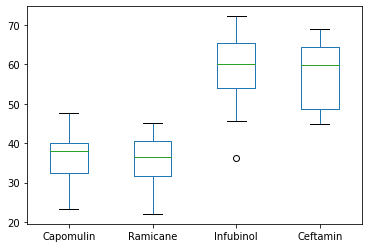

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
vol_df.boxplot(treatments, grid = False)


## Line and Scatter Plots

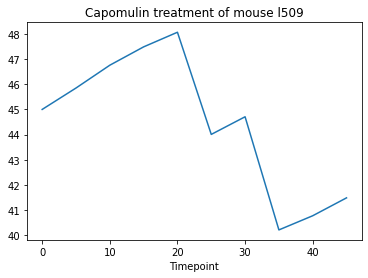

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509 = mouse_df.loc[mouse_df["Mouse ID"]=="l509"]
l509.plot.line(x="Timepoint",y="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509",
              legend= False)

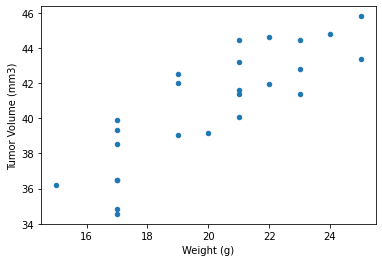

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
capo_df.head()
groupedmean = capo_df.groupby("Mouse ID").mean()
groupedmean.plot.scatter("Weight (g)","Tumor Volume (mm3)")


## Correlation and Regression

Correlation coefficient:
0.8419363424694718


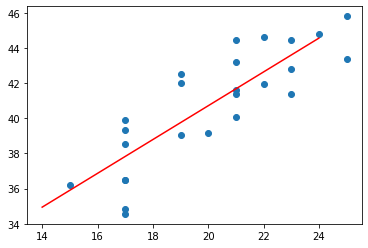

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_df.groupby("Mouse ID").mean()
corr_df = pd.DataFrame()
corr_df["Mouse ID"] = capo_df["Mouse ID"]
corr_df["Tumor Volume (mm3)"] = capo_df["Tumor Volume (mm3)"]
corr_df["Weight (g)"] = capo_df["Weight (g)"]
print("Correlation coefficient:")
print(corr_df.groupby("Mouse ID").mean().corr(method='pearson').loc["Weight (g)"]["Tumor Volume (mm3)"])

(x_value, y_value) = st.pearsonr(corr_df["Weight (g)"],corr_df["Tumor Volume (mm3)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(corr_df["Weight (g)"],corr_df["Tumor Volume (mm3)"])
x = np.arange(14,25)
y = slope*x + intercept
plt.plot(x,y,'-r')
plt.scatter(groupedmean["Weight (g)"],groupedmean["Tumor Volume (mm3)"])
plt.show()